# Analysis


In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fiona
from shapely.geometry import MultiPoint, Point, Polygon,shape
import random

## Data Cleaning and preprocessing

In [55]:
calc_df_fixed=pd.read_csv('../outputs/calc_fixed_df.csv', low_memory=False)
mm_df=pd.read_csv('../outputs/mm_dataset.csv')
#removing all non geolocated services
calc_df_fixed = calc_df_fixed.drop(calc_df_fixed[calc_df_fixed['long'].isna()].index)

Cleaning all housing units outside of comune di milano

In [32]:
multipol = fiona.open(r"../datasets/milan_shape/L090102_ComuneMilano.shp")
multi = next(iter(multipol))

found=False
while not found:
    a=random.uniform(8.8, 9.37)
    b=random.uniform(45.35, 45.9)
    point = Point(a, b)
    found=point.within(shape(multi['geometry']))

print(a, b)

KeyboardInterrupt: 

multipol = fiona.open(r"C:\Users\Jordi\Downloads\ESP_adm_shp\ESP_adm0.shp")
multi = next(iter(multipol))

point = Point(0,42)
point.within(shape(multi['geometry']))

## Summary statistics

In [33]:
desc_mm=calc_df_fixed.groupby('df_name').describe()
desc_mm=desc_mm.drop(['long', 'lat'], axis=1)
desc_mm=desc_mm.T
desc_mm.head()

df_name               acqua       biblio    ciclabili        consu  \
10001708 count    52.000000    26.000000  3722.000000    21.000000   
         mean   4837.286538  4852.173077  4710.625631  3401.933333   
         std    2227.730313  2356.413434  2021.426698  1740.142727   
         min     300.000000   732.400000   167.700000  1149.100000   
         25%    3003.850000  2909.925000  3254.175000  2033.500000   

df_name                cult        distr      edicole     farmacie  \
10001708 count    75.000000   847.000000   562.000000   414.000000   
         mean   3293.048000  3922.098229  4272.305160  4305.478261   
         std     978.047843  1758.667532  1940.521378  2024.596546   
         min    1743.900000   578.900000   342.800000   233.000000   
         25%    2801.900000  2658.950000  2807.500000  2879.775000   

df_name               metro       parchi  ...         serd         sinf  \
10001708 count   110.000000  1065.000000  ...    15.000000   263.000000   
         mean   5610.150909  4802.970047  ...  4445.560000  4764.759696   
         std    3056.697970  2108.603931  ...  1921.965073  2176.150858   
         min    1174.400000   172.600000  ...  2578.400000   201.800000   
         25%    3591.875000  3716.500000  ...  3333.200000  3084.600000   

df_name                sita        sport        sprim          ss2  \
10001708 count   114.000000  1041.000000  1718.000000   174.000000   
         mean   4274.764035  5144.240346  4792.983818  4073.697701   
         std    2024.712556  2223.316616  2151.748558  1787.300165   
         min     455.300000   168.200000   302.400000   819.000000   
         25%    2918.900000  3472.400000  3121.600000  2981.025000   

df_name                ssec        treni          uni         wifi  
10001708 count  1128.000000    24.000000   711.000000   596.000000  
         mean   4544.281294  4543.304167  3615.077637  4699.220638  
         std    2058.149003  2247.137897  1642.314869  2046.524959  
         min     302.400000   879.500000   906.800000   204.500000  
         25%    2922.825000  3174.725000  2450.500000  3049.850000  

[5 rows x 21 columns]

In [34]:
min_services=calc_df_fixed.groupby('df_name').min()
min_services=min_services.drop(['long', 'lat', 'cat1_name', 'cat2_name'], axis=1)
desc_services=pd.DataFrame()
desc_services['min']=min_services.min(axis=1)
desc_services['id_min']=min_services.idxmin(axis=1)
max_services=calc_df_fixed.groupby('df_name').min()
max_services=max_services.drop(['long', 'lat', 'cat1_name', 'cat2_name'], axis=1)
desc_services['max']=max_services.max(axis=1)
desc_services['id_max']=max_services.idxmax(axis=1)
avg_services=calc_df_fixed.groupby('df_name').mean()
desc_services['avg']=avg_services.mean(axis=1)
sd_services=calc_df_fixed.groupby('df_name').std()
desc_services['sd']=avg_services.std(axis=1)
desc_services

C:\Users\iodio\AppData\Local\Temp\ipykernel_17512\2763110821.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  min_services=calc_df_fixed.groupby('df_name').min()
C:\Users\iodio\AppData\Local\Temp\ipykernel_17512\2763110821.py:6: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  max_services=calc_df_fixed.groupby('df_name').min()
C:\Users\iodio\AppData\Local\Temp\ipykernel_17512\2763110821.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_services=calc_df_fixed.groupb

,min,id_min,max,id_max,avg,sd
df_name,,,,,,
acqua,42.9,51038202,13984.1,10004632,5981.121308,2356.561473
biblio,25.2,41021101,15024.7,10004632,5676.825949,2427.694043
ciclabili,7.7,51023704,12537.1,10004632,5767.238697,2421.775766
consu,18.8,30001601,16405.1,10004632,5364.003629,2481.104408
cult,52.8,20000804,15840.1,10004632,4859.519565,2536.023484
distr,31.7,51010801,13909.9,10004632,5344.889841,2459.737776
edicole,6.0,10001902,13663.2,10004632,5534.591833,2428.477730
farmacie,0.0,30003501,13321.0,10004632,5556.572903,2422.580220
metro,33.8,10003802,12504.2,10004632,6680.246512,2349.028751


In [35]:
max_20=calc_df_fixed.groupby('df_name').min()
max_20=max_20.drop(['long', 'lat', 'cat1_name', 'cat2_name'], axis=1)
max_20=max_20.T
max_20

C:\Users\iodio\AppData\Local\Temp\ipykernel_17512\4154215261.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  max_20=calc_df_fixed.groupby('df_name').min()


df_name,acqua,biblio,ciclabili,consu,cult,distr,edicole,farmacie,metro,parchi,...,serd,sinf,sita,sport,sprim,ss2,ssec,treni,uni,wifi
10001708,300.0,732.4,167.7,1149.1,1743.9,578.9,342.8,233.0,1174.4,172.6,...,2578.4,201.8,455.3,168.2,302.4,819.0,302.4,879.5,906.8,204.5
10001709,300.0,732.4,167.7,1149.1,1743.9,578.9,342.8,233.0,1174.4,172.6,...,2578.4,201.8,455.3,168.2,302.4,819.0,302.4,879.5,906.8,204.5
10001710,300.0,732.4,167.7,1149.1,1743.9,578.9,342.8,233.0,1174.4,172.6,...,2578.4,201.8,455.3,168.2,302.4,819.0,302.4,879.5,906.8,204.5
10001711,300.0,732.4,167.7,1149.1,1743.9,578.9,342.8,233.0,1174.4,172.6,...,2578.4,201.8,455.3,168.2,302.4,819.0,302.4,879.5,906.8,204.5
10001712,300.0,732.4,167.7,1149.1,1743.9,578.9,342.8,233.0,1174.4,172.6,...,2578.4,201.8,455.3,168.2,302.4,819.0,302.4,879.5,906.8,204.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51039405,832.8,952.8,372.5,644.2,4377.2,837.7,514.8,756.2,532.6,1489.9,...,2969.7,350.9,564.3,745.3,425.6,1077.7,717.5,557.6,2607.6,573.5
51039406,832.8,952.8,372.5,644.2,4377.2,837.7,514.8,756.2,532.6,1489.9,...,2969.7,350.9,564.3,745.3,425.6,1077.7,717.5,557.6,2607.6,573.5
51039407,832.8,952.8,372.5,644.2,4377.2,837.7,514.8,756.2,532.6,1489.9,...,2969.7,350.9,564.3,745.3,425.6,1077.7,717.5,557.6,2607.6,573.5
51039408,832.8,952.8,372.5,644.2,4377.2,837.7,514.8,756.2,532.6,1489.9,...,2969.7,350.9,564.3,745.3,425.6,1077.7,717.5,557.6,2607.6,573.5


(array([798.,  55.,  25.,   5.,   3.,   4.,  26.,  11.,   2.,   2.]),
 array([   17.5 ,  1528.69,  3039.88,  4551.07,  6062.26,  7573.45,
         9084.64, 10595.83, 12107.02, 13618.21, 15129.4 ]),
 <BarContainer object of 10 artists>)

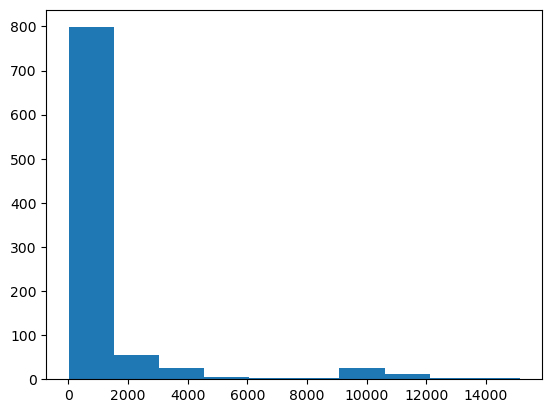

In [36]:
plt.hist(max_20['ss2'])

# Index calculator

We construct the index as illustrated in the paper

In [107]:
def penality_function(x, dhat):
    if x <= dhat:
        return 1
    if x > dhat:
        return 1/(x-dhat+1)


def con_index(dist_list, dhat, n_max, alpha, beta):
    if  alpha + beta != 1:
        raise Exception("Alpha and Beta should sum to one")
    d_min = min(dist_list)
    close_list=[d for d in dist_list if d <=dhat]
    n = len(close_list)
    CI = alpha*penality_function(d_min, dhat)+beta*(n/n_max)
    return CI, beta*(n/n_max), n/n_max

con_index([9,4,5,6,6], 5, 3, 0.5, 0.5)

(0.8333333333333333, 0.3333333333333333, 0.6666666666666666)

In [92]:
def best_in_class(df_name, dhat, df=calc_df_fixed):
    e_list=list(df.columns)
    e_list=[item for item in e_list if item not in ['name', 'long', 'lat','df_name', 'cat1', 'cat2', 'cat1_name', 'cat2_name']]
    nmax_dict=dict.fromkeys(e_list)
    if df_name=='all':
        pass
    else:
        df=df[df.df_name==df_name]
    for elem in e_list:
        dist_list=list(df[str(elem)])
        close_list=[d for d in dist_list if d <=dhat]
        nmax_dict[elem]=len(close_list)
    return max(nmax_dict.values())

best_in_class('biblio', 60*15)

3

ValueError: min() arg is an empty sequence

In [119]:
min(calc_df_fixed['10002602'].to_list())

30.2

In [135]:
mm_columns_list=['CODICE EDIFICIO', 'full_address', 'lat', 'lon']
index_df=mm_df[mm_columns_list]
index_df=index_df.reindex(columns=mm_columns_list+list(calc_df_fixed.df_name.unique())+['all'])
index_df

,CODICE EDIFICIO,full_address,lat,lon,acqua,biblio,ciclabili,consu,cult,edicole,...,sita,sport,sprim,ss2,ssec,treni,uni,wifi,distr,all
0,10001708,VIA DEL TURCHINO 20 MILANO,45.451893,9.228053,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001709,VIA DEL TURCHINO 20 MILANO,45.451893,9.228053,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001710,VIA DEL TURCHINO 20 MILANO,45.451893,9.228053,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001711,VIA DEL TURCHINO 20 MILANO,45.451893,9.228053,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001712,VIA DEL TURCHINO 22 MILANO,45.451893,9.228053,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,51039405,VIA SENIGALLIA 60/G MILANO,45.532143,9.168970,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
976,51039406,VIA SENIGALLIA 60 MILANO,45.532143,9.168970,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
977,51039407,VIA SENIGALLIA 60 MILANO,45.532143,9.168970,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
978,51039408,VIA SENIGALLIA 60 MILANO,45.532143,9.168970,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
columns_list=list(calc_df_fixed.df_name.unique())+['all']

In [139]:
def fun_run(codice_edificio, dhat, alpha, beta, out_df, df=calc_df_fixed):
    columns_list=list(df.df_name.unique())+['all']
    #columns_list=['all']
    for column in columns_list:
        if column=='all':
            pass
        else:
            df=df[df.df_name==column]
        dist_list=df[str(codice_edificio)].to_list()
        if dist_list==[]:
            out=np.nan
        else:
            n_max=best_in_class(column, dhat)
            out=con_index(dist_list=dist_list, dhat=dhat, n_max=n_max, alpha=alpha, beta=beta)
        print(out)
        out_df.at[out_df.index[out_df['CODICE EDIFICIO'] == codice_edificio], column] = out
    return 1

fun_run(10002605, dhat=60*15, alpha=0.5, beta=0.5, out_df=index_df)

(0.6666666666666666, 0.16666666666666666, 0.3333333333333333)


InvalidIndexError: You can only assign a scalar value not a <class 'tuple'>